In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [92]:
df_data = pd.read_csv("../Data/preprocessed_alcohol_balance_perperson.csv")
# display(df_data)
print(list(df_data))
print(df_data.shape)

['Conditie', 'SubjectID', 'Height', 'Weight', 'Age', 'BMI', 'Alcohol', 'Alcohol_Class', 'Balance_MLrange', 'Balance_MLstdev', 'Balance_MLmeanVelocity', 'Balance_APrange', 'Balance_APstdev', 'Balance_APmeanVelocity', 'Balance_MeanVelocity', 'GaitVelocity', 'MovementVelocity', 'std_SegmentData', 'mad_SegmentData', 'mean_StepLength', 'Velocity']
(308, 21)


In [93]:
df_data = df_data[df_data.Conditie == "norm"]
print(df_data.shape)

(154, 21)


In [94]:
# df_data = df_data.drop([118, 166, 268])

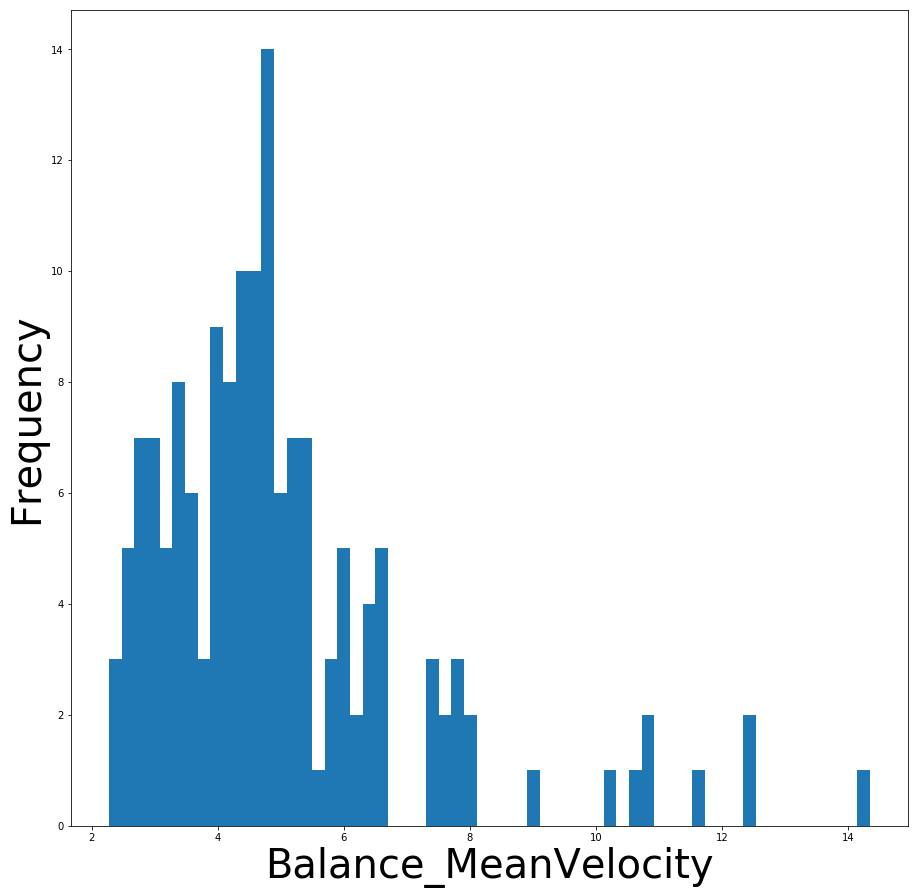

In [115]:
df_data = df_data.sort_values("Balance_MeanVelocity")
fig = df_data["Balance_MeanVelocity"].plot.hist(bins=60, figsize=(15,15))
# fig.set_title("Distribution of standing balance", fontsize = 55)
fig.set_xlabel('Balance_MeanVelocity', fontsize=40)
fig.set_ylabel('Frequency', fontsize=40)
fig = plt.savefig('distributionbalance.png')

In [102]:
df_data["Balance_MeanVelocity_Class"] = pd.qcut(df_data['Balance_MeanVelocity'], 2, labels=["Good", "Bad"])

In [103]:
df_data = df_data.sort_values("SubjectID")

In [104]:
# display(df_data)
# df_data.to_csv(path_or_buf="../Data/preprocessed_balance_perperson_nobril_equal.csv", index=False)

In [105]:
df_new = df_data

for i, _ in df_new.iterrows(): 
    if df_new["Balance_MeanVelocity"][i] <= 6.0: 
        df_new["Balance_MeanVelocity_Class"][i] = "Good"
    if df_new["Balance_MeanVelocity"][i] > 6.0: 
        df_new["Balance_MeanVelocity_Class"][i] = "Bad"

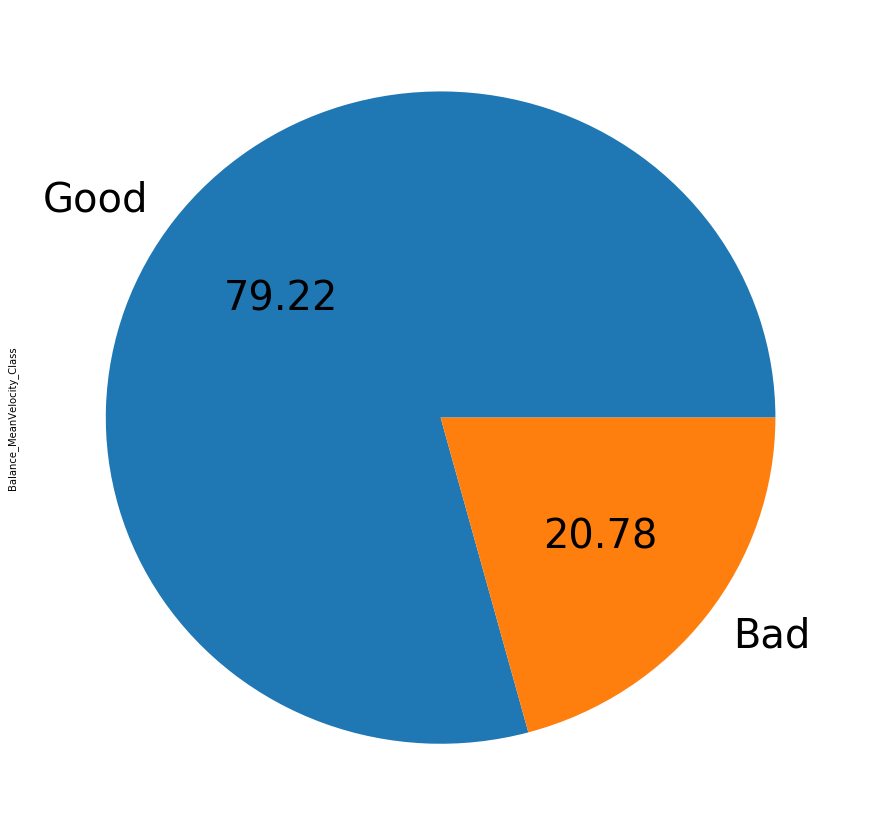

In [116]:
# PIECHARTS
headers = [
 "Balance_MeanVelocity_Class"]

for header in headers:
    perc = pd.DataFrame(df_new[header].value_counts(normalize=True) * 100).sort_index()
    perc.plot.pie(subplots=True, autopct='%.2f', legend=False, figsize=(15,15), fontsize=40)
#     plt.title("Division in good and bad balance", fontsize=55)
    plt.savefig("balancedivision.png")
    plt.show()


# display(df_new)

In [68]:
df_new.to_csv(path_or_buf="../Data/preprocessed_balance_perperson_nobril_80-20.csv", index=False)

In [82]:
df_newnew = df_data
df_newnew["Balance_MeanVelocity_Class"] = pd.qcut(df_data['Balance_MeanVelocity'], 3, labels=["good", "medium", "bad" ])
df_newnew = df_newnew.sort_values("SubjectID")
df_newnew.to_csv(path_or_buf="../Data/preprocessed_balance_perperson_nobril_three_equal.csv", index=False)